# Reaction Time Analysis

In this experiment, we investigated whether there was a difference in subjects' reaction time between mentally different demanding conditions. For this, the participants were asked to press a certain computer key as soon as a stimulus was displayed on the computer screen: 

The mentally less demanding Stimulus showed a color change of the screen background, whereupon the subjects were asked to press the space bar.
The mentally demanding stimulus showed a random number between one and three, upon which the subjects were asked to press the respective number on the keyboard.
    
The study has a within-subjects design, i.e. the subjects received both parts of the experiment and the reaction time was measured for both stimuli. 
In order to collect enough data per participant without fatigue, ten repetitions per condition were performed.
Depending on the participant number, the experiment was started with stimulus one or stimulus two. This randomized order of the stimuli was intended to prevent a possible sequence or learning effect. 

Six subjects of different age and profession were tested.

In [29]:
# imports
import pandas as pd # data mangling
import matplotlib
from matplotlib import pyplot as plt
import scipy
import numpy as np
import seaborn as sns

## Import data and create a DataFrame with relevant data

In [2]:
df_reaction_time = pd.read_csv('logs.csv')

In [3]:
display (df_reaction_time)

,ID,condition,shown_stimulus,pressed_key,is_correct_key,reaction_time_in_ms,timestamp
0,1,simple,orange,Space,True,244,2021-05-01 09:21:38.767333
1,1,simple,orange,Space,True,271,2021-05-01 09:21:45.765831
2,1,simple,orange,Space,True,298,2021-05-01 09:21:50.392569
3,1,simple,orange,Space,True,240,2021-05-01 09:21:57.771664
4,1,simple,orange,Space,True,256,2021-05-01 09:22:02.467861
...,...,...,...,...,...,...,...
115,6,simple,orange,Space,True,542,2021-05-01 15:23:42.325476
116,6,simple,orange,Space,True,346,2021-05-01 15:23:49.331361
117,6,simple,orange,Space,True,382,2021-05-01 15:23:55.876172
118,6,simple,orange,Space,True,408,2021-05-01 15:24:01.879209


In [4]:
# extract the relevant data for further processing
df_sample_rt = df_reaction_time[['ID', 'condition', 'is_correct_key', 'reaction_time_in_ms']]

df_sample_rt

,ID,condition,is_correct_key,reaction_time_in_ms
0,1,simple,True,244
1,1,simple,True,271
2,1,simple,True,298
3,1,simple,True,240
4,1,simple,True,256
...,...,...,...,...
115,6,simple,True,542
116,6,simple,True,346
117,6,simple,True,382
118,6,simple,True,408


## Basic Findings

In [47]:
print("All values are time in ms")

mean_simple = np.mean(reaction_time_simple)
mean_complex = np.mean(reaction_time_complex)
print("Mean simple: " + str(mean_simple))
print("Mean complex: " + str(mean_complex))

std_simple = np.std(reaction_time_simple)
std_complex = np.std(reaction_time_complex)

print("STD simple: " + str(std_simple))
print("STD complex: " + str(std_complex))

max_simple = np.max(reaction_time_simple)
max_complex = np.max(reaction_time_complex)

print("Max simple: " + str(max_simple))
print("Max complex: " + str(max_complex))

min_simple = np.min(reaction_time_simple)
min_complex = np.min(reaction_time_complex)

print("Min simple: " + str(min_simple))
print("Min complex: " + str(min_complex))

All values are time in ms
Mean simple: 317.75
Mean complex: 506.5
STD simple: 64.00172523716321
STD complex: 101.30588992419608
Max simple: 542
Max complex: 798
Min simple: 225
Min complex: 297


## Scatterplots

The following figures show the distribution of reaction times of each condition type

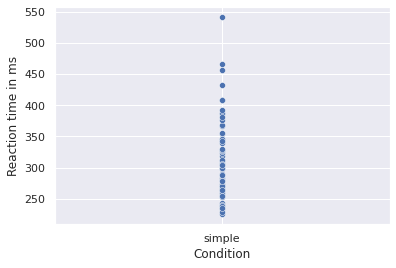

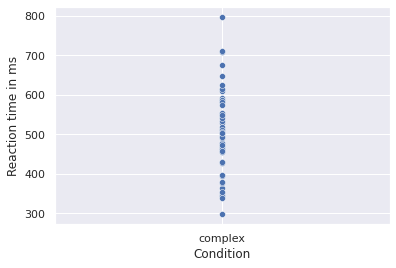

In [79]:
df_scatter = df_reaction_time[['condition', 'reaction_time_in_ms']]
plot = sns.scatterplot(
    data = df_scatter[(df_scatter['condition'] == 'simple')],
    x = "condition",
    y = "reaction_time_in_ms",
)
plot.set(xlabel = "Condition", ylabel = "Reaction time in ms")
plt.show()

plot = sns.scatterplot(
    data = df_scatter[(df_scatter['condition'] == 'complex')],
    x = "condition",
    y = "reaction_time_in_ms",
)
plot.set(xlabel = "Condition", ylabel = "Reaction time in ms")
plt.show()

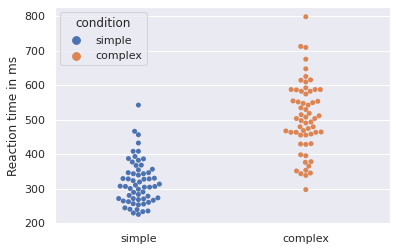

In [99]:
plot = sns.swarmplot(
    data = df_scatter,
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "condition",
)
plot.set(xlabel = "", ylabel = "Reaction time in ms")

plt.show()

## Accuracy

The figure below shows the key press accuracy of the *complex condition* (e.g. whether or not the correct key was pressed)

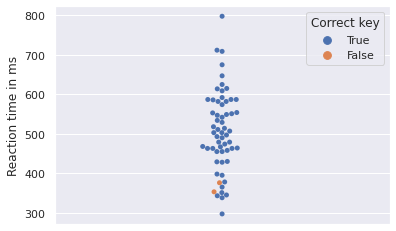

In [100]:
plot = sns.swarmplot(
    data = df_sample_rt[(df_sample_rt['condition'] == 'complex')],
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "is_correct_key",
    hue_order = [True, False]
)
plot.set(xlabel = "", ylabel = "Reaction time in ms", xticklabels = [])
plot.legend(title = "Correct key")

plt.show()

## Boxplots

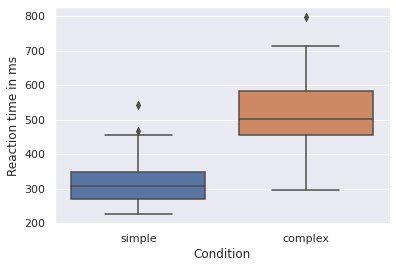

In [80]:
plot = sns.boxplot(
    data = df_scatter,
    x = "condition",
    y = "reaction_time_in_ms"
)
plot.set(xlabel = "Condition", ylabel = "Reaction time in ms")

plt.show()

## T - Test

In [48]:
reaction_time_simple = df_scatter[(df_scatter['condition'] == 'simple')]['reaction_time_in_ms']
reaction_time_complex = df_scatter[(df_scatter['condition'] == 'complex')]['reaction_time_in_ms']

scipy.stats.ttest_ind(reaction_time_simple, reaction_time_complex)

Ttest_indResult(statistic=-12.098994884095681, pvalue=2.0872706133172615e-22)

## Discussion

Reacting to a complex stimulus (one that has a decision making process involved) is on average about 59.4% slower than reacting to a simple stimulus. Our findings are statistically significant, with p < 0.001. The accuracy of our participants was very high, with only 2 false button presses across the entire experiment.